<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [113]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [54]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import arviz as az

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import KFold, cross_val_predict

import scipy.stats
import matplotlib.pyplot as pyplot
import scipy.stats as stats 
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 
import statsmodels.api as sm

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [31]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston=pd.read_csv(boston_url)
boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


We will be working with a data set based on housing prices derived from the U.S. Census Service.

There are an extensive number of features, so they've been described in the table below.
### Features
·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

We can find more information about the features and types using the info() method.

In [32]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


According to the output above, we have 506 entries or rows, as well as 14 features. The "Non-Null Count" column shows the number of non-null entries. If the count is 506 then there is no missing values for that particular feature. The 'MEDV' is our target, or response variable, and the rest of the features are our predictor variables.

We also have a mix of numerical (1 int64 and 13 float64) and object data type (0 object).

The describe() function will provide the statistical information about all numeric values.

In [33]:
boston.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Here, we will check if we have any missing values 

### Data Cleaning and Wrangling

In [34]:
boston.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

Also, checked for any duplicates by running duplicated() function through 'Unnamed: 0' records, since each row has a unique value.

In [35]:
sum(boston.duplicated(subset = 'Unnamed: 0')) == 0

True

We unselected 'Unnamed: 0' from our data frame, since they will no longer be needed.

In [36]:
boston_df = boston.loc[:,['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']]

### Feature Engineering

Next, we engineered some features, for better visualizations and analysis. We grouped our data by 'age'. We  created a new column for this newly assigned group our categories are owners that are:
* 35 years and younger (0).
* between 35 and 70 years (1).
* 70 years and older (2).

In [37]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '0'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = '1'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '2'

### Exploratory Data Analysis

List of Categorical Variables:

*   CHAS
*   age_group


We used the `boxplot()` function on the above mentioned categorical variables, to display the mean, variance, and possible outliers, with respect to the median value of houses (MEDV).


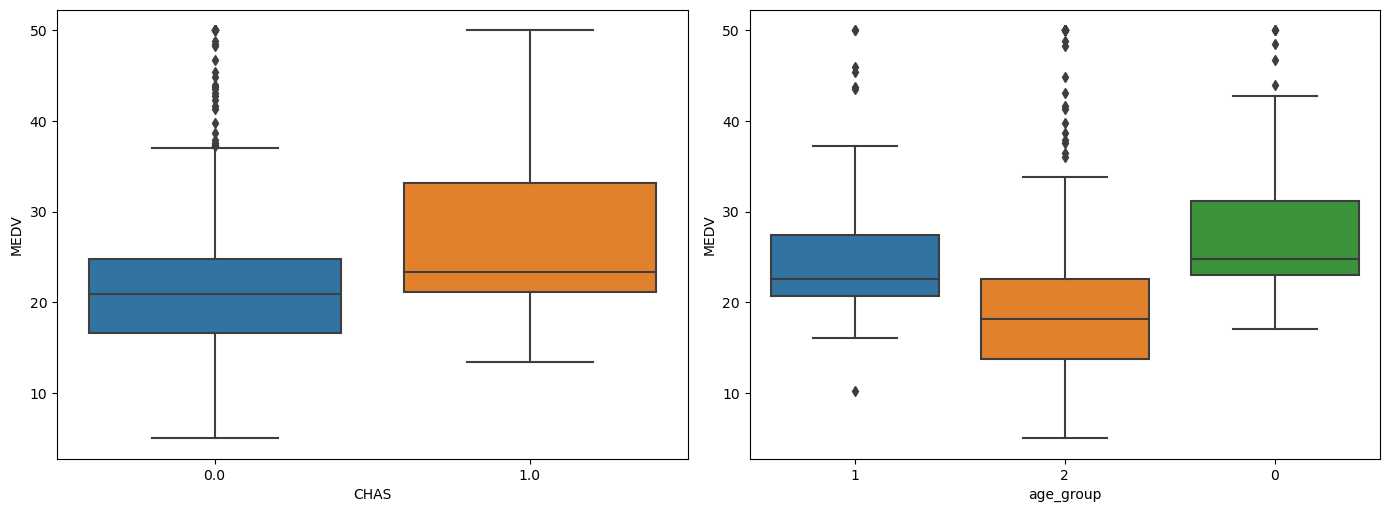

In [38]:
plt.figure(figsize=(14, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'CHAS', y = 'MEDV', data = boston_df)
plt.subplot(4,2,2)
sns.boxplot(x = 'age_group', y = 'MEDV', data = boston_df)
plt.tight_layout()
plt.show()

Next, we viewed the list of top features that have high correlation coefficient. The `corr()` function calculates the Pearson'r correlation coefficients with respect to the 'MEDV'.

In [39]:
corr_matrix = boston_df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

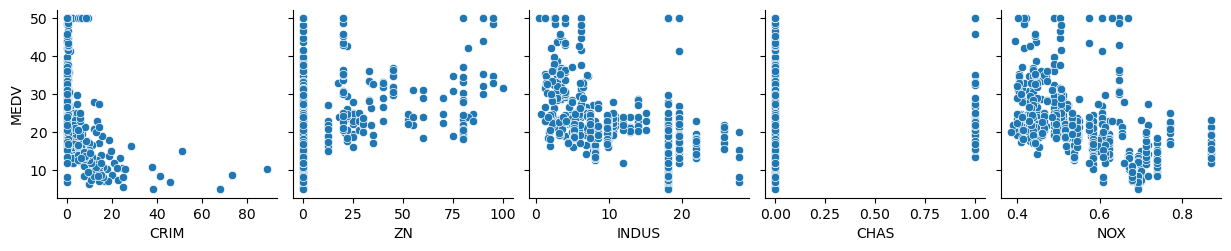

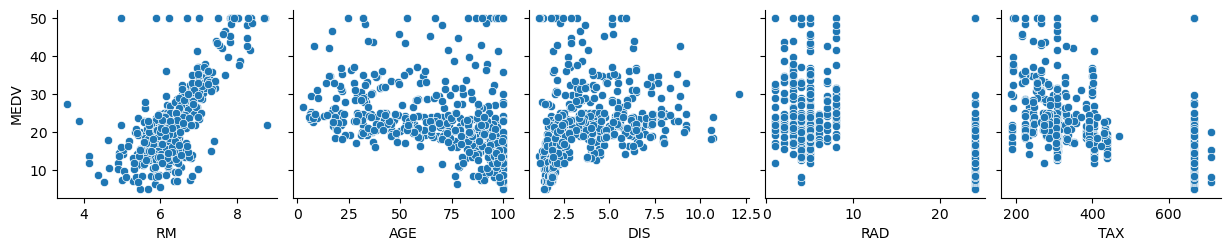

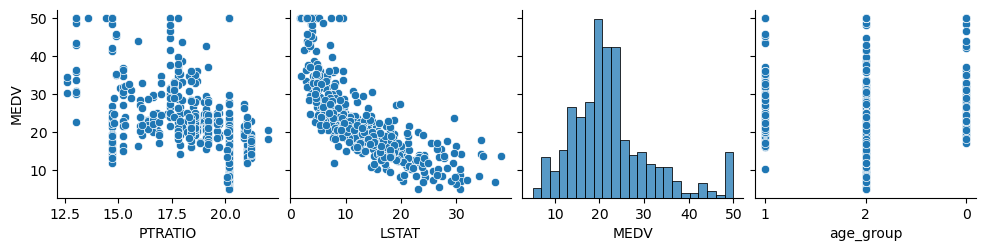

In [40]:
for i in range(0, len(boston_df.columns), 5):
    sns.pairplot(data=boston_df,
                x_vars=boston_df.columns[i:i+5],
                y_vars=['MEDV'])

From the graph above, there's a positive correlation between 'RM' and 'MEDV'

# 2. Objectives


*   Combine data standardization with the train-test split procedure
*   Implement regularization to prevent overfitting in regression problems
*   Apply polynomial transforms to data
*   Test of Significance to ascertain the best model with respect to it accuracy (Interpretability).

# 3. Linear Regression Models


#### Model 1

In [41]:
mask = boston_df.dtypes == np.float
float_cols = boston_df.columns[mask]

In [42]:
#Check for skewed columns
skew_limit = 0.75
skew_vals = boston_df[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
CRIM,5.223149
CHAS,3.405904
ZN,2.225666
MEDV,1.108098
DIS,1.011781
RAD,1.004815
LSTAT,0.906460
PTRATIO,-0.802325


In [43]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

for col in skew_cols.index.tolist():
    boston_df[col] = np.log1p(boston_df[col])
     

In [44]:
X = boston_df.drop('MEDV', axis=1)
y = boston_df.MEDV
s = StandardScaler()
lr = LinearRegression()
kf = KFold(shuffle=True, random_state=72018, n_splits=3) # cross validation
alphas = np.geomspace(0.01, 0.02, 4)

In [45]:
# Model 1, Vanilla linear regression
scores1 = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("regression", lr)])

    predictions_1 = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions_1)
    
    scores1.append(score)
m1=np.mean(scores1)
m1

0.7767622917204466

#### Model 2

In [46]:
# model with polynomial features
pf = PolynomialFeatures(degree=2)

scores2 = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("regression", lr)])

    predictions_2 = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions_2)
    
    scores2.append(score)
m2=np.mean(scores2)
m2

0.7765642337812371

### model 3

In [47]:
# model with polynomial features and Lasso regularisation
pf = PolynomialFeatures(degree=2)

scores3 = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions_3 = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions_3)
    
    scores3.append(score)
m3=np.mean(scores3)   
m3

0.8094640701462864

# 4. Insights and key findings


Here we look at how the predicted values of each model fit to the test data and use test of significance to acertain that Model 1, Model 2 and Model 3 are unique from one another.

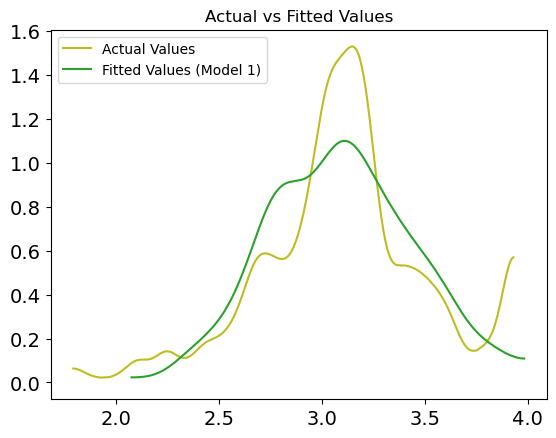

In [48]:
fig, ax = plt.subplots()
ax.set_title("Actual vs Fitted Values")
az.plot_dist(y, color="C8", label="Actual Values")
az.plot_dist(predictions_1, color="C2", label="Fitted Values (Model 1)", ax=ax)
plt.show()


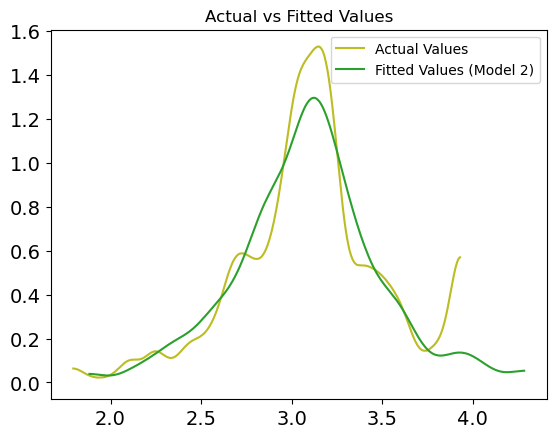

In [49]:
fig, ax = plt.subplots()
ax.set_title("Actual vs Fitted Values")
az.plot_dist(y, color="C8", label="Actual Values")
az.plot_dist(predictions_2, color="C2", label="Fitted Values (Model 2)", ax=ax)
plt.show()


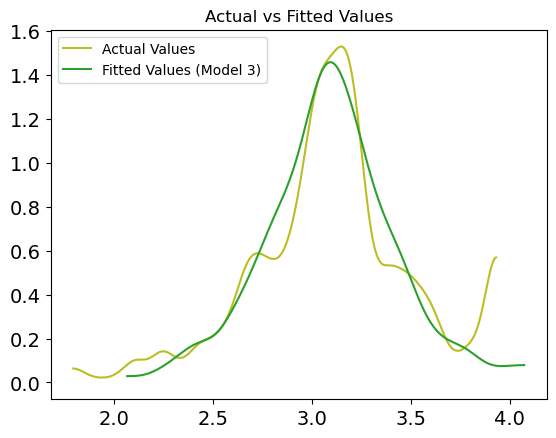

In [26]:
fig, ax = plt.subplots()
ax.set_title("Actual vs Fitted Values")
az.plot_dist(y, color="C8", label="Actual Values")
az.plot_dist(predictions_3, color="C2", label="Fitted Values (Model 3)", ax=ax)
plt.show()


State the hypothesis
* $H_0: µ_1 = µ_2$ ("there is no difference in mean squared error between Model 2 and Model 3")
* $H_1: µ_1 ≠ µ_2$ ("there is a difference in mean squared error between Model 2 and Model 3")

Confidence level is 5%.

In [276]:
scipy.stats.levene(scores2, scores3, center='mean')
#since the p-value is less than 0.05, the variance are not equal.

LeveneResult(statistic=9.893938921107402, pvalue=0.01992914992131509)

In [277]:
import scipy.stats
scipy.stats.ttest_ind(scores2, scores3, equal_var = False)

Ttest_indResult(statistic=-8.0961482818519, pvalue=0.0039380659987889735)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in mean squared error between Model 2 and Model 3. 

Model 3 best fit the test data. Lasso regularisation was used since the features of boston_df data show poor correlation. If the features of the boston_df data had shown multicollinearity Elastinet regularisation would have been preferred. Lasso regularisation showed high interpretability.

# 5. Next Steps


We can use a 5-fold cross validation (n_splits = 5). Use GridSearch and Pipeline to find the best hyper-parameters of the model.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
